In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
# Read CSV
df = pd.read_csv("/content/Netflix Dataset.csv")

# Preview data
print("🔹 Dataset Preview:")
display(df.head())

# Dataset Information
print("\n🔹 Basic Info:")
df.info()

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Dataset Shape:", df.shape)

🔹 Dataset Preview:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...



🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

🔹 Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

🔹 Dataset Shape: (7789, 1

In [6]:
# Data Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

# Convert date_added to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year_added
df['year_added'] = df['Release_Date'].dt.year

# Rename columns if needed
# Assuming 'release_year' might be a column you intend to use, but it's not in the original df.
# Based on the error and the df.head(), 'Release_Date' is the relevant column.
# The original code was trying to rename 'release_year' to 'release_year', which is redundant and the column doesn't exist.
# I will remove the unnecessary rename and adjust the date column usage.

/tmp/ipython-input-1102525635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


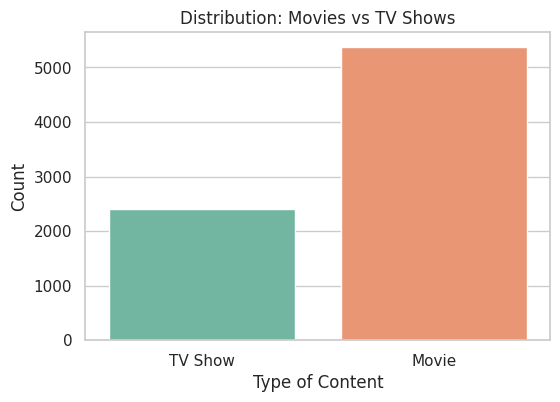

In [8]:
# ---- Distribution: Movies vs TV Shows ----
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title("Distribution: Movies vs TV Shows")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

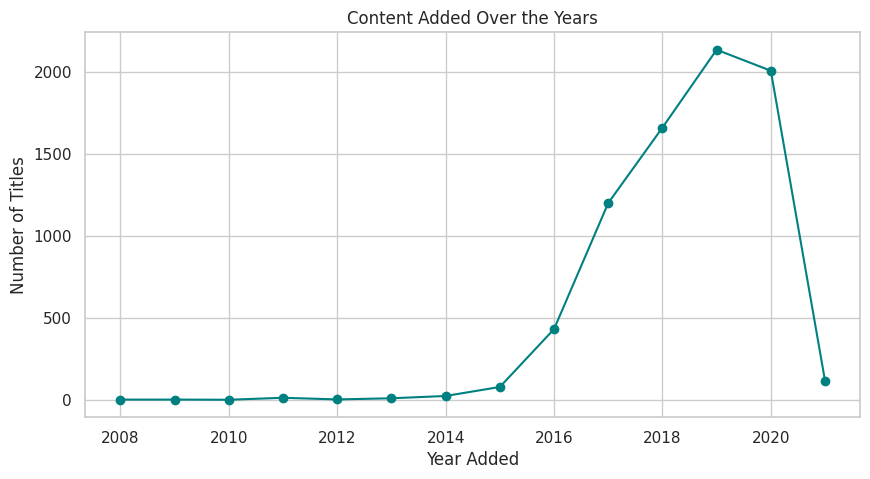

In [9]:
# ---- Content Added Over the Years ----
content_trend = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
content_trend.plot(kind='line', marker='o', color='teal')
plt.title("Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

/tmp/ipython-input-3081685330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


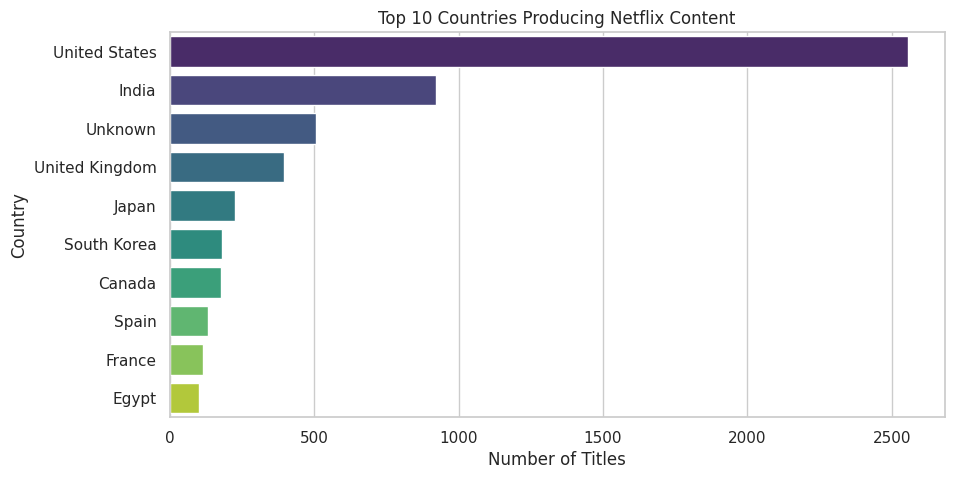

In [11]:
# ---- Top 10 Countries ----
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-729650593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='coolwarm')


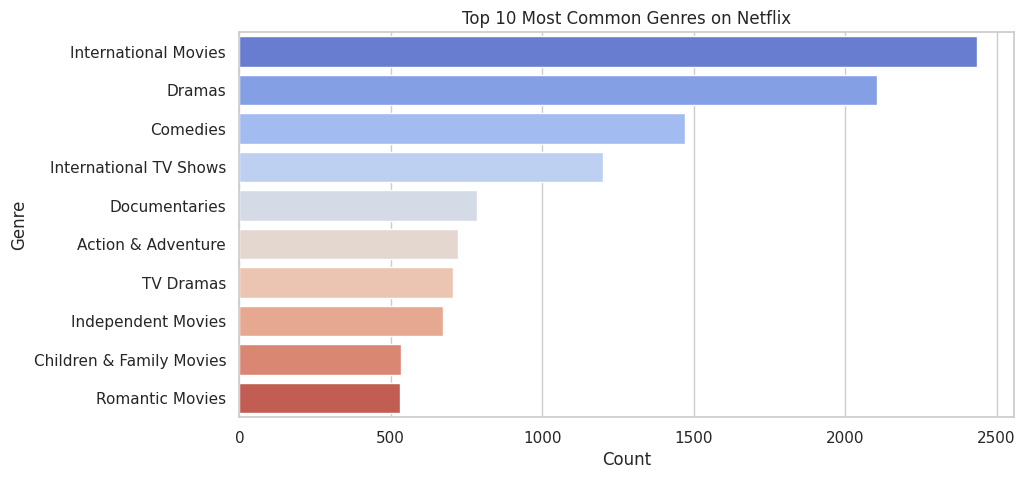

In [13]:
# ---- Top 10 Genres ----
genres = df['Type'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=genres.values, y=genres.index, palette='coolwarm')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

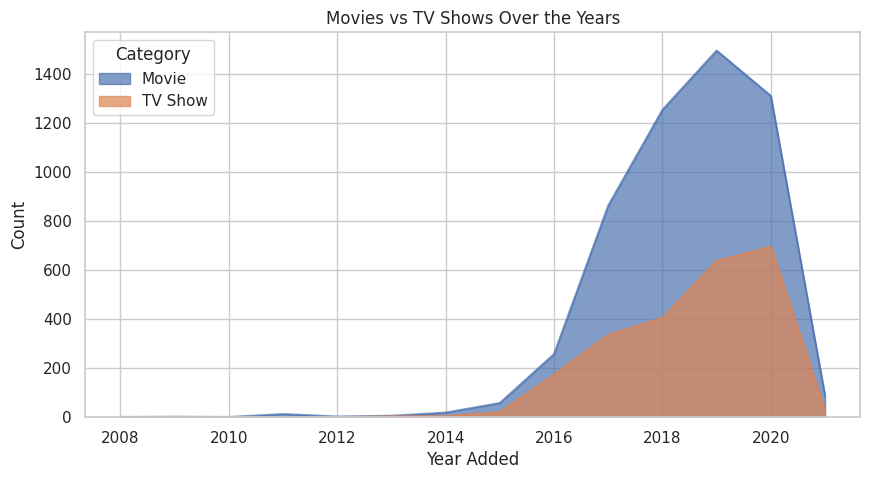

In [15]:
# ---- Trend: Movies vs TV Shows by Year ----
type_trend = df.groupby(['year_added', 'Category']).size().unstack()
type_trend.plot(kind='area', stacked=False, alpha=0.7)
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

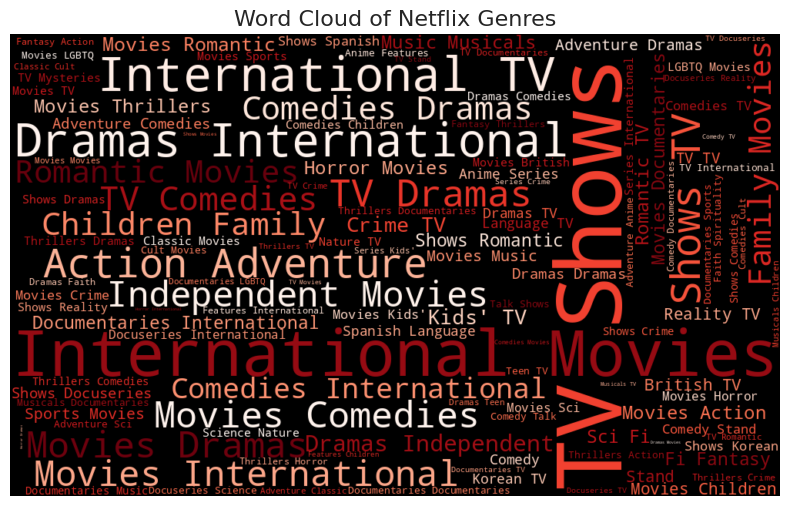

In [17]:
#Advance analysis
# ---- Word Cloud of Genres ----
text = " ".join(df['Type'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Netflix Genres", fontsize=16)
plt.show()

/tmp/ipython-input-361749560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')


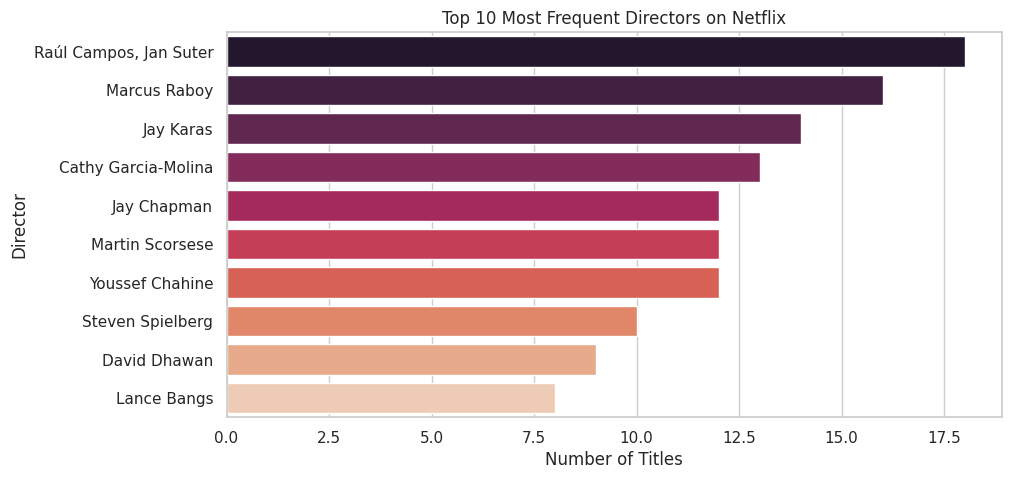

In [19]:
# ---- Top 10 Directors ----
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

In [20]:
# ---- Content Duration Distribution ----
if 'duration' in df.columns:
    movie_duration = df[df['type'] == 'Movie']['duration'].str.replace(' min','').astype(float)
    plt.figure(figsize=(8,4))
    sns.histplot(movie_duration, bins=30, color='orange', kde=True)
    plt.title("Distribution of Movie Duration")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Frequency")
    plt.show()

/tmp/ipython-input-888442975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='crest')


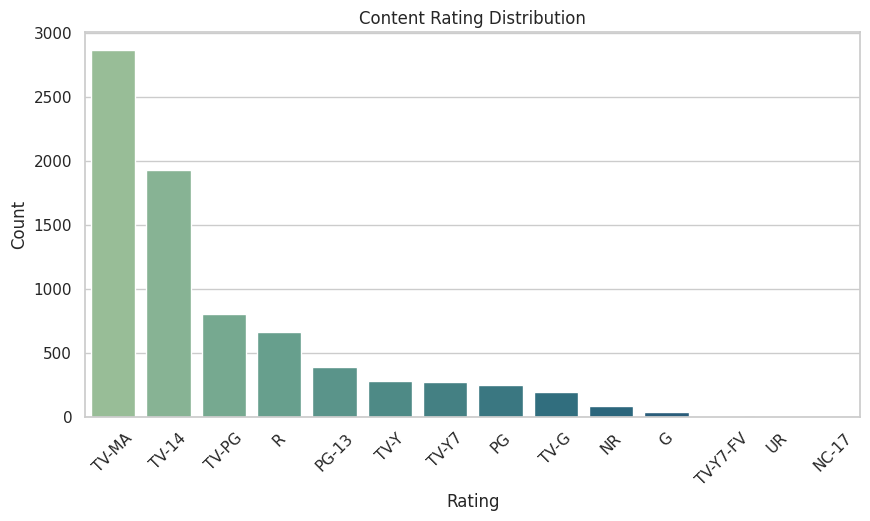

In [22]:
# ---- Ratings Distribution ----
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='crest')
plt.title("Content Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [24]:
# ---- Interactive Visualization (Plotly) ----
fig = px.histogram(df, x="year_added", color="Category", barmode="group",
                   title="Interactive: Movies vs TV Shows by Year",
                   labels={"year_added": "Year", "count": "Titles"})
fig.show()

In [ ]:
#Insights Stragetic Recommendation
print("\n INSIGHTS:")
print("1️) Movies dominate Netflix’s catalog, though TV Shows have steadily increased since 2016.")
print("2) 2017–2020 marks the fastest content growth period on Netflix.")
print("3️) The United States, India, and the UK lead in content contributions.")
print("4️) Genres such as International Movies, Dramas, and Comedies are most frequent.")
print("5️) Ratings like TV-MA and TV-14 dominate, showing adult-focused content trends.")
print("6️) Increasing global content presence shows Netflix’s focus on localization.")

print("\n🎯 STRATEGIC RECOMMENDATIONS:")
print("1) Continue expanding in fast-growing international markets (India, Korea, Spain).")
print("2) Invest in high-performing genres (Crime, Drama, Thriller, Documentary).")
print("3) Maintain a balance between Movies and TV Shows to attract diverse audiences.")
print("4) Explore new content categories based on emerging viewer data.")
print("5) Strengthen regional partnerships to support localized production.")

print("\n Analysis Complete...")